# Census Tract Data: Hispanic or Latino by Race
The following is the census tract data for Los Angeles County in year 20xx looking at the indicators: Hispanic or Latino by Race

Author: Genevieve Chacon

# Importing Data

We are going to import the pandas library to handle our data.

In [13]:
import pandas as pd

In [141]:
import geopandas as gpd

# Loading the Data

loading and reading the data dowloaded from the social explorer website

In [16]:
df = pd.read_csv('Data/race.csv')

# Quick Look at the Data

checking the size of our data.

In [17]:
df.shape

(2498, 65)

In [19]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_B04001_001,SE_B04001_002,SE_B04001_003,SE_B04001_004,SE_B04001_005,SE_B04001_006,SE_B04001_007,SE_B04001_008,SE_B04001_009,SE_B04001_010
0,6037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,3879,2874,2305,11,6,405,0,8,139,1005
1,6037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,4247,3908,2940,99,0,607,0,0,262,339
2,6037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,3583,1800,1308,8,40,341,0,5,98,1783
3,6037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,3723,2520,2070,97,0,209,0,113,31,1203
4,6037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,2690,1775,1570,17,0,131,57,0,0,915


#Fixing the Geo_FIPS Column

we need to make the FIPS column count as a string instead of an integer

In [21]:
df = pd.read_csv(
    'Data/race.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)

In [22]:
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_US,Geo_REGION,Geo_DIVISION,...,SE_B04001_001,SE_B04001_002,SE_B04001_003,SE_B04001_004,SE_B04001_005,SE_B04001_006,SE_B04001_007,SE_B04001_008,SE_B04001_009,SE_B04001_010
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,NaN,NaN,NaN,...,3879,2874,2305,11,6,405,0,8,139,1005
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,NaN,NaN,NaN,...,4247,3908,2940,99,0,607,0,0,262,339
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,NaN,NaN,NaN,...,3583,1800,1308,8,40,341,0,5,98,1783
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,NaN,NaN,NaN,...,3723,2520,2070,97,0,209,0,113,31,1203
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,NaN,NaN,NaN,...,2690,1775,1570,17,0,131,57,0,0,915


In [23]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Geo_FIPS       2498 non-null   object 
 1   Geo_QName      2498 non-null   object 
 2   Geo_FILEID     2498 non-null   object 
 3   Geo_STUSAB     2498 non-null   object 
 4   Geo_SUMLEV     2498 non-null   int64  
 5   Geo_GEOCOMP    2498 non-null   int64  
 6   Geo_LOGRECNO   2498 non-null   int64  
 7   Geo_US         0 non-null      float64
 8   Geo_REGION     0 non-null      float64
 9   Geo_DIVISION   0 non-null      float64
 10  Geo_STATECE    0 non-null      float64
 11  Geo_STATE      2498 non-null   object 
 12  Geo_COUNTY     2498 non-null   object 
 13  Geo_COUSUB     0 non-null      float64
 14  Geo_PLACE      0 non-null      float64
 15  Geo_TRACT      2498 non-null   int64  
 16  Geo_BLKGRP     0 non-null      float64
 17  Geo_CONCIT     0 non-null      float64
 18  Geo_AIAN

# Deleting null columns

In [24]:
df.columns[df.isna().all()].tolist()

['Geo_US',
 'Geo_REGION',
 'Geo_DIVISION',
 'Geo_STATECE',
 'Geo_COUSUB',
 'Geo_PLACE',
 'Geo_BLKGRP',
 'Geo_CONCIT',
 'Geo_AIANHH',
 'Geo_AIANHHFP',
 'Geo_AIHHTLI',
 'Geo_AITSCE',
 'Geo_AITS',
 'Geo_ANRC',
 'Geo_CBSA',
 'Geo_CSA',
 'Geo_METDIV',
 'Geo_MACC',
 'Geo_MEMI',
 'Geo_NECTA',
 'Geo_CNECTA',
 'Geo_NECTADIV',
 'Geo_UA',
 'Geo_UACP',
 'Geo_CDCURR',
 'Geo_SLDU',
 'Geo_SLDL',
 'Geo_VTD',
 'Geo_ZCTA3',
 'Geo_ZCTA5',
 'Geo_SUBMCD',
 'Geo_SDELM',
 'Geo_SDSEC',
 'Geo_SDUNI',
 'Geo_UR',
 'Geo_PCI',
 'Geo_TAZ',
 'Geo_UGA',
 'Geo_PUMA5',
 'Geo_PUMA1',
 'Geo_BTTR',
 'Geo_BTBG',
 'Geo_PLACESE']

In [25]:
df = df.dropna(axis=1,how="all")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Geo_FIPS       2498 non-null   object
 1   Geo_QName      2498 non-null   object
 2   Geo_FILEID     2498 non-null   object
 3   Geo_STUSAB     2498 non-null   object
 4   Geo_SUMLEV     2498 non-null   int64 
 5   Geo_GEOCOMP    2498 non-null   int64 
 6   Geo_LOGRECNO   2498 non-null   int64 
 7   Geo_STATE      2498 non-null   object
 8   Geo_COUNTY     2498 non-null   object
 9   Geo_TRACT      2498 non-null   int64 
 10  Geo_GEOID      2498 non-null   object
 11  Geo_NAME       2498 non-null   object
 12  SE_B04001_001  2498 non-null   int64 
 13  SE_B04001_002  2498 non-null   int64 
 14  SE_B04001_003  2498 non-null   int64 
 15  SE_B04001_004  2498 non-null   int64 
 16  SE_B04001_005  2498 non-null   int64 
 17  SE_B04001_006  2498 non-null   int64 
 18  SE_B04001_007  2498 non-null

In [27]:
# reinspecting data
df.head()

,Geo_FIPS,Geo_QName,Geo_FILEID,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_LOGRECNO,Geo_STATE,Geo_COUNTY,Geo_TRACT,...,SE_B04001_001,SE_B04001_002,SE_B04001_003,SE_B04001_004,SE_B04001_005,SE_B04001_006,SE_B04001_007,SE_B04001_008,SE_B04001_009,SE_B04001_010
0,06037101110,"Census Tract 1011.10, Los Angeles County, Cali...",ACSSF,ca,140,0,4200,06,037,101110,...,3879,2874,2305,11,6,405,0,8,139,1005
1,06037101122,"Census Tract 1011.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4201,06,037,101122,...,4247,3908,2940,99,0,607,0,0,262,339
2,06037101220,"Census Tract 1012.20, Los Angeles County, Cali...",ACSSF,ca,140,0,4202,06,037,101220,...,3583,1800,1308,8,40,341,0,5,98,1783
3,06037101221,"Census Tract 1012.21, Los Angeles County, Cali...",ACSSF,ca,140,0,4203,06,037,101221,...,3723,2520,2070,97,0,209,0,113,31,1203
4,06037101222,"Census Tract 1012.22, Los Angeles County, Cali...",ACSSF,ca,140,0,4204,06,037,101222,...,2690,1775,1570,17,0,131,57,0,0,915


# Defining to Keep

using our indicators to define what columns to keep

 B04001_001:   Total Population:
            B04001_002:      Not Hispanic or Latino:
            B04001_003:         White Alone
            B04001_004:         Black or African American Alone
            B04001_005:         American Indian and Alaska Native Alone
            B04001_006:         Asian Alone
            B04001_007:         Native Hawaiian and Other Pacific Islander Alone
            B04001_008:         Some Other Race Alone
            B04001_009:         Two or More Races
            B04001_010:      Hispanic or Latino


In [28]:
columns_to_keep = ['Geo_FIPS',
                   'SE_B04001_001', 
                   'SE_B04001_002',
                   'SE_B04001_003',
                   'SE_B04001_004',
                   'SE_B04001_005',
                   'SE_B04001_006',
                   'SE_B04001_007',
                   'SE_B04001_008',
                   'SE_B04001_009',
                   'SE_B04001_010',]

In [29]:
# add it to a new dataframe
df2 = df[columns_to_keep]

# Renaming the Columns

In [30]:
columns = list(df2) # this is the same as df.columns.to_list()
columns

['Geo_FIPS',
 'SE_B04001_001',
 'SE_B04001_002',
 'SE_B04001_003',
 'SE_B04001_004',
 'SE_B04001_005',
 'SE_B04001_006',
 'SE_B04001_007',
 'SE_B04001_008',
 'SE_B04001_009',
 'SE_B04001_010']

In [33]:
df2.columns = ['FIPS',
'TotalPop',
               'Not Hispanic or Latino',
               'White Alone',
            'Black or African American Alone',
               'American Indian and Alaska Native Alone',
               'Asian Alone',
               'Native Hawaiian and Other Pacific Islander Alone',
               'Some Other Race Alone',
               'Two or More Races',
               'Hispanic or Latino']               

In [34]:
df2.sample(5)

,FIPS,TotalPop,Not Hispanic or Latino,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino
517,06037195802,2928,1287,445,46,0,704,0,77,15,1641
86,06037111205,3761,2873,1381,70,0,1214,0,57,151,888
603,06037207711,1881,1691,955,150,0,567,0,19,0,190
926,06037262802,3198,3043,2569,10,0,287,0,0,177,155
1467,06037461100,5012,2760,1571,833,0,152,0,0,204,2252


# Creating Stats and Plots

In [35]:
# access a single column like df['col_name']
df2['TotalPop'].head()

0    3879
1    4247
2    3583
3    3723
4    2690
Name: TotalPop, dtype: int64

In [36]:
# What is the mean?
df2['TotalPop'].mean()

4011.062850280224

In [37]:
# What is the median?
df2['TotalPop'].median()

3933.0

In [38]:
# get some stats
df2['TotalPop'].describe()

count     2498.00000
mean      4011.06285
std       1470.99188
min          0.00000
25%       2993.25000
50%       3933.00000
75%       4954.00000
max      13830.00000
Name: TotalPop, dtype: float64

In [39]:
df2['Hispanic or Latino'].describe()

count    2498.000000
mean     1953.010008
std      1422.184921
min         0.000000
25%       752.000000
50%      1691.500000
75%      2929.500000
max      8126.000000
Name: Hispanic or Latino, dtype: float64

<AxesSubplot: ylabel='Frequency'>

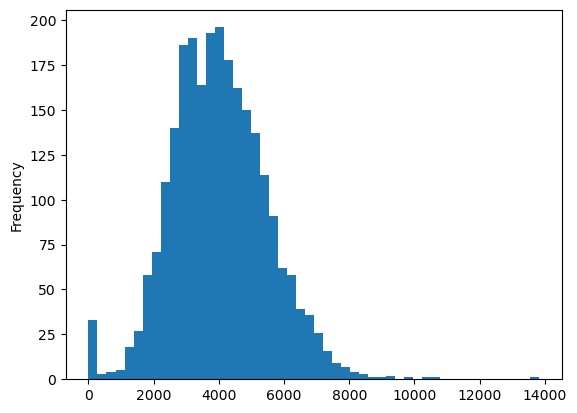

In [40]:
# plot it as a historgram with 50 bins
df2['TotalPop'].plot.hist(bins=50)

<AxesSubplot: >

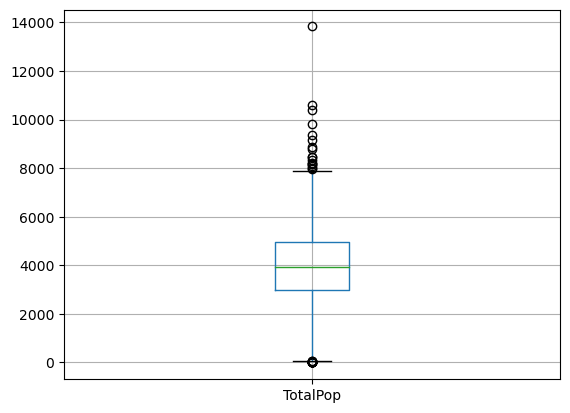

In [41]:
# box plot: notice the different syntax to generate it
df2.boxplot(column=['TotalPop'])

<AxesSubplot: ylabel='Frequency'>

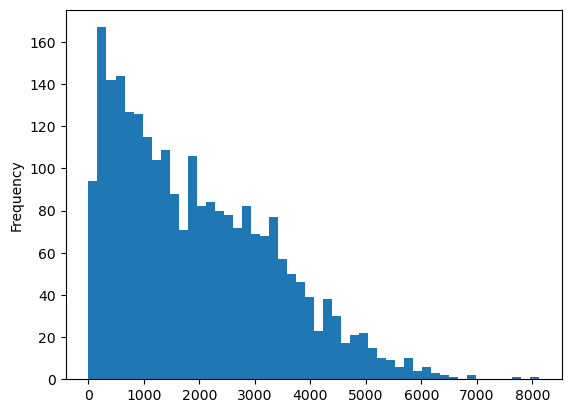

In [44]:
df2['Hispanic or Latino'].plot.hist(bins=50)

<AxesSubplot: xlabel='Not Hispanic or Latino', ylabel='Hispanic or Latino'>

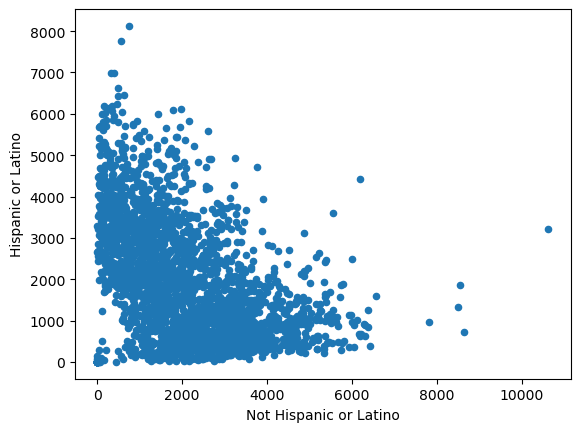

In [43]:
df2.plot.scatter(x='Not Hispanic or Latino',y='Hispanic or Latino')

# Sorting
What are the top 10 most populated census tracts? What are the census tracts with the highest latino popluation?

In [45]:
df_sorted = df2.sort_values(by='TotalPop',ascending = False)

In [46]:
# display the data, but just a few columns to keep it clean
df_sorted[['FIPS','TotalPop']].head(10)

,FIPS,TotalPop
938,06037265301,13830
580,06037206020,10614
2438,06037920121,10391
1028,06037275604,9814
2278,06037702900,9355
2406,06037920028,9158
1604,06037502303,8883
69,06037108202,8776
2417,06037920043,8468
1207,06037401707,8464


<AxesSubplot: xlabel='FIPS'>

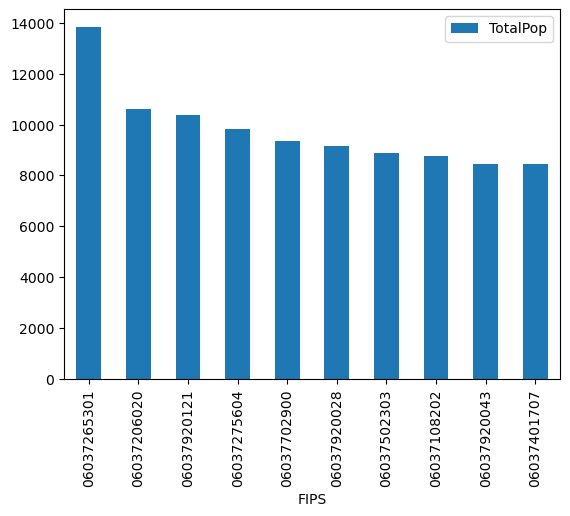

In [47]:
# plot it
df_sorted.head(10).plot.bar(x='FIPS',
                            y='TotalPop')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population in Los Angeles County in 2021'}, ylabel='FIPS'>

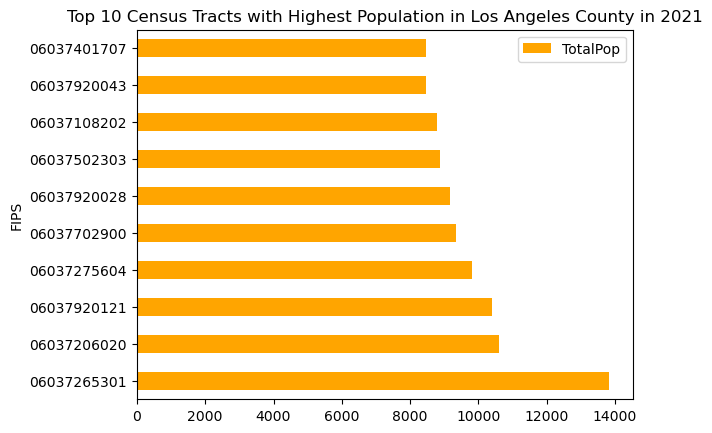

In [62]:
# Make it prettier with a title
df_sorted.head(10).plot.barh(x='FIPS',
                            y='TotalPop', 
                            title='Top 10 Census Tracts with Highest Population in Los Angeles County in 2021',
                            color='orange')

In [54]:
df_sorted_latino = df2.sort_values(by='Hispanic or Latino',ascending = False)

In [58]:
df_sorted_latino[['FIPS','Hispanic or Latino']].head(10)

,FIPS,Hispanic or Latino
1604,06037502303,8126
1740,06037535101,7751
1679,06037532101,6982
1766,06037540000,6976
1581,06037500700,6619
1603,06037502200,6460
1681,06037532200,6433
1691,06037532900,6233
1743,06037535300,6184
1757,06037535804,6179


<AxesSubplot: xlabel='FIPS'>

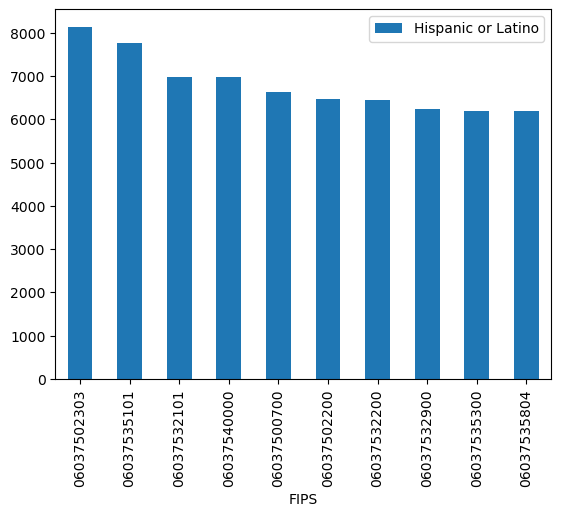

In [59]:
df_sorted_latino.head(10).plot.bar(x='FIPS',
                            y='Hispanic or Latino')

<AxesSubplot: title={'center': 'Top 10 Census Tracts with Highest Population of Hispanics or Latinos in Los Angeles County in 2021'}, ylabel='FIPS'>

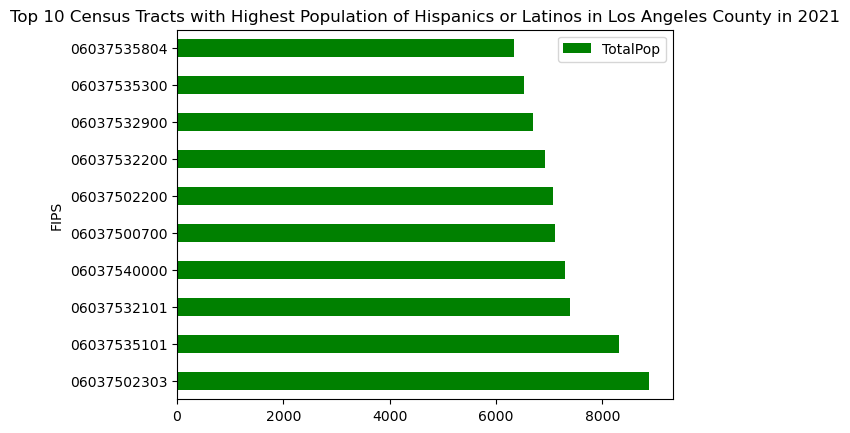

In [65]:
# Make it prettier with a title
df_sorted_latino.head(10).plot.barh(x='FIPS',
                            y='TotalPop', 
                            title='Top 10 Census Tracts with Highest Population of Hispanics or Latinos in Los Angeles County in 2021',
                            color='green')

# Filtering and Subsetting Data

In [112]:
# subset the data so that we can see the data per row... 
# in other words, this syntax is asking to "show me the values in my dataframe that match this filter
# show me census tract with more than 6000 Hispanic or Latinos
df2[df2['Hispanic or Latino']>= 6000]

,FIPS,TotalPop,Not Hispanic or Latino,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino
1176,06037320300,6403,336,196,28,55,57,0,0,0,6067
1319,06037406903,8080,1972,264,435,0,1036,160,0,77,6108
1581,06037500700,7102,483,231,49,0,199,0,0,4,6619
1603,06037502200,7078,618,401,7,9,201,0,0,0,6460
1604,06037502303,8883,757,494,188,0,23,0,8,44,8126
1650,06037530302,6412,276,66,25,0,183,0,0,2,6136
1679,06037532101,7382,400,64,0,0,336,0,0,0,6982
1681,06037532200,6921,488,189,102,0,176,0,21,0,6433
1691,06037532900,6698,465,22,406,0,37,0,0,0,6233
1740,06037535101,8319,568,64,434,0,0,0,38,32,7751


In [115]:
# create a new variable for census tracts with more than 6000 latinos
df_6000_up_latinos = df2[df2['Hispanic or Latino']>=6000]

In [117]:
# how many records?
print('There are ' + str(len(df_6000_up_latinos)) + ' census tracts with more than 6000 Hispanic or Latinos in them')

There are 16 census tracts with more than 6000 Hispanic or Latinos in them


In [140]:
# display it
df_6000_up_latinos[['FIPS','Hispanic or Latino']]

,FIPS,Hispanic or Latino
1176,06037320300,6067
1319,06037406903,6108
1581,06037500700,6619
1603,06037502200,6460
1604,06037502303,8126
1650,06037530302,6136
1679,06037532101,6982
1681,06037532200,6433
1691,06037532900,6233
1740,06037535101,7751


In [137]:
# show me census tract with more than 4000 Black people
df2[df2['Black or African American Alone']>= 4000]

,FIPS,TotalPop,Not Hispanic or Latino,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino
1814,06037543304,6886,6216,683,4911,0,246,0,0,376,670
1818,06037543322,6937,6310,290,5075,0,318,248,0,379,627
2279,06037703002,6813,6431,950,4608,0,277,0,0,596,382
2281,06037703100,6286,5926,480,4641,21,356,11,22,395,360


# Map Time!

we imported geopandas earlier so lets get this party started by importing new census GIS data

In [143]:
# read in a geojson file downloaded from the LA Times
tracts=gpd.read_file('Data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot: >

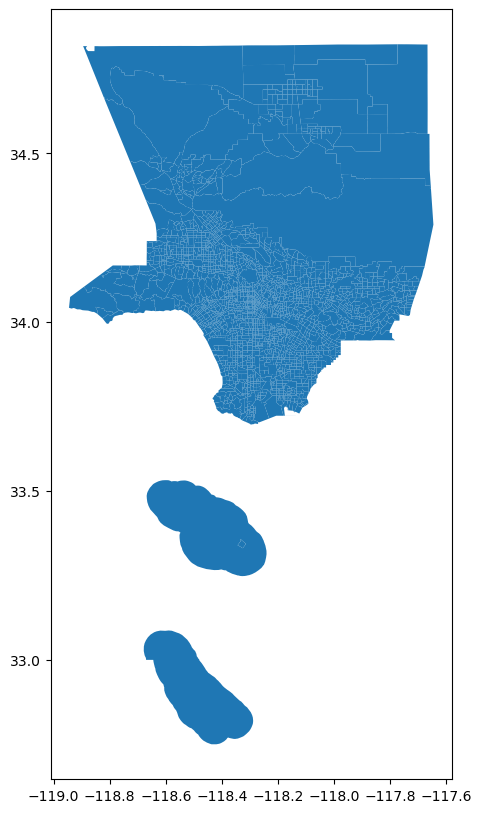

In [144]:
# plot it!
tracts.plot(figsize=(12,10))

In [145]:
# tell me more about this dataset
tracts.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       2495 non-null   int64   
 1   CT20           2495 non-null   object  
 2   LABEL          2495 non-null   object  
 3   ShapeSTArea    2495 non-null   float64 
 4   ShapeSTLength  2495 non-null   float64 
 5   geometry       2495 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(2)
memory usage: 117.1+ KB


In [146]:
# we only really need FIPS and geometry, so let's subset the data
tracts = tracts[['CT20','geometry']]
tracts.head()

,CT20,geometry
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [151]:
# create a FIPS column #if the column ur creating doesnt exist, python will create it, if it does then it will replace it
tracts['FIPS'] ='06' + '037' + tracts['CT20']

In [152]:
# check it!
tracts.head()

,CT20,geometry,FIPS
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222


# Merging/joining data
In order to map our census data from social explorer, we need to merge, or join it to our census tract geojson.

In [153]:
# create a new dataframe based on the join #tracts is the base bc its spatial data and we dont want to change that
tracts_race=tracts.merge(df2,on="FIPS")

In [154]:
# what does it look like now?
tracts_race.head()

,CT20,geometry,FIPS,TotalPop,Not Hispanic or Latino,White Alone,Black or African American Alone,American Indian and Alaska Native Alone,Asian Alone,Native Hawaiian and Other Pacific Islander Alone,Some Other Race Alone,Two or More Races,Hispanic or Latino
0,101110,"POLYGON ((-118.28491 34.25948, -118.28492 34.2...",06037101110,3879,2874,2305,11,6,405,0,8,139,1005
1,101122,"POLYGON ((-118.29015 34.27417, -118.29015 34.2...",06037101122,4247,3908,2940,99,0,607,0,0,262,339
2,101220,"POLYGON ((-118.28100 34.25592, -118.28198 34.2...",06037101220,3583,1800,1308,8,40,341,0,5,98,1783
3,101221,"POLYGON ((-118.28735 34.25591, -118.28863 34.2...",06037101221,3723,2520,2070,97,0,209,0,113,31,1203
4,101222,"POLYGON ((-118.28594 34.25405, -118.28594 34.2...",06037101222,2690,1775,1570,17,0,131,57,0,0,915


<AxesSubplot: >

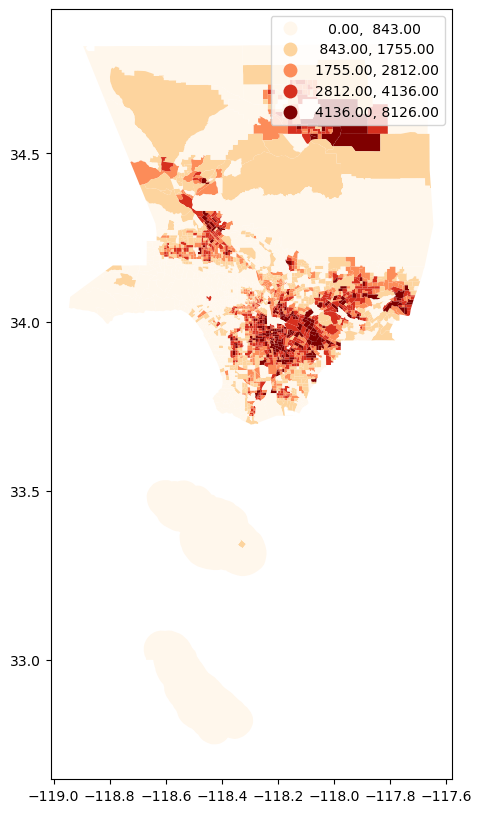

In [160]:
tracts_race.plot(figsize=(12,10),
                 column='Hispanic or Latino', 
                 cmap='OrRd',
                 legend=True, 
                 scheme='NaturalBreaks')

<AxesSubplot: >

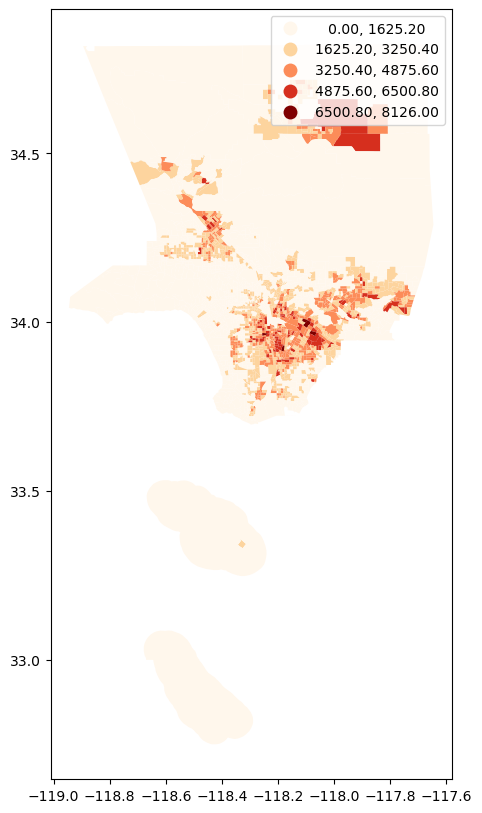

In [161]:
tracts_race.plot(figsize=(12,10),
                 column='Hispanic or Latino',
                 cmap='OrRd',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

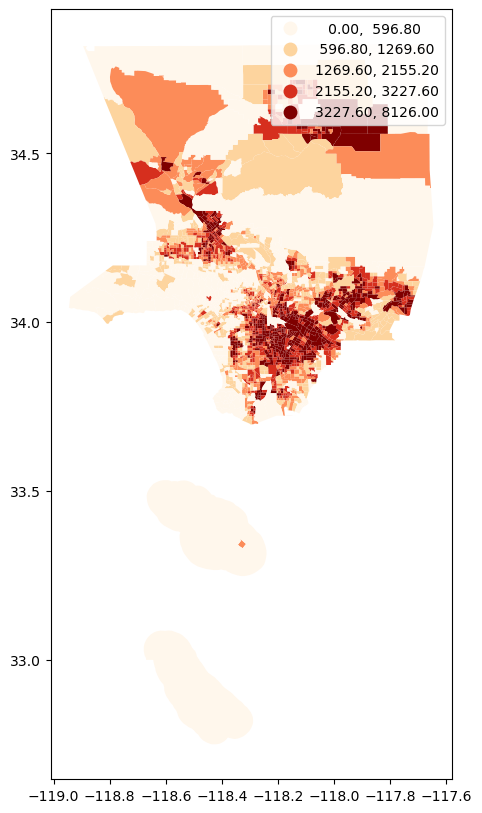

In [162]:
tracts_race.plot(figsize=(12,10),
                 column='Hispanic or Latino',
                 cmap='OrRd',
                 legend=True, 
                 scheme='quantiles') #quantiles are evenly divided

In [178]:
#ethnic clusters
# First, create new columns for percentages
tracts_race['PCT_Black'] = tracts_race['Black or African American Alone']/tracts_race['TotalPop']*100
tracts_race['PCT_White'] = tracts_race['White Alone']/tracts_race['TotalPop']*100
tracts_race['PCT_Asian'] = tracts_race['Asian Alone']/tracts_race['TotalPop']*100
tracts_race['PCT_Hispanic'] = tracts_race['Hispanic or Latino']/tracts_race['TotalPop']*100

<AxesSubplot: >

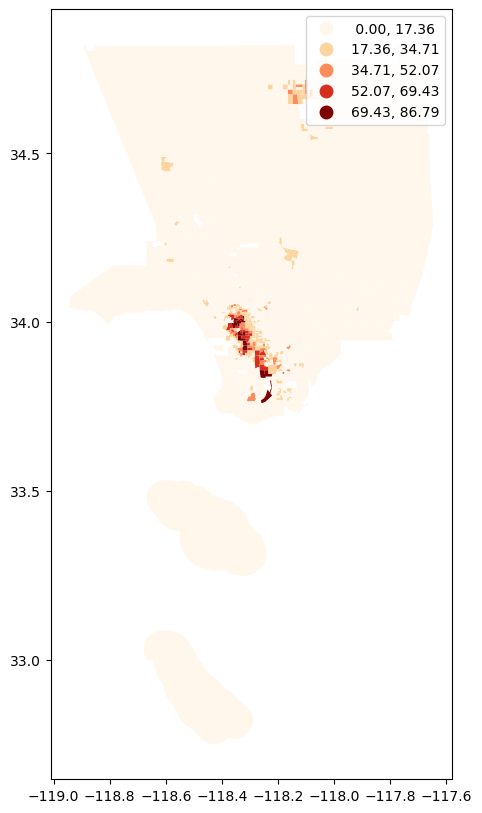

In [172]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_Black',
                 cmap='OrRd',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

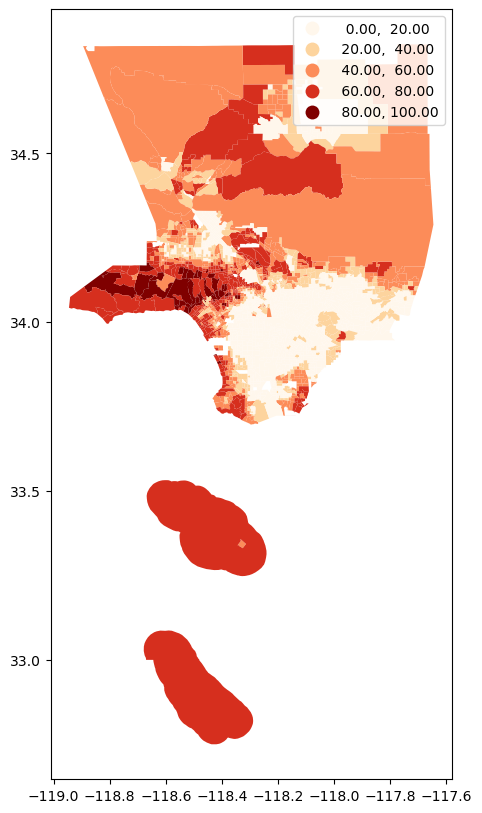

In [167]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_White',
                 cmap='OrRd',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

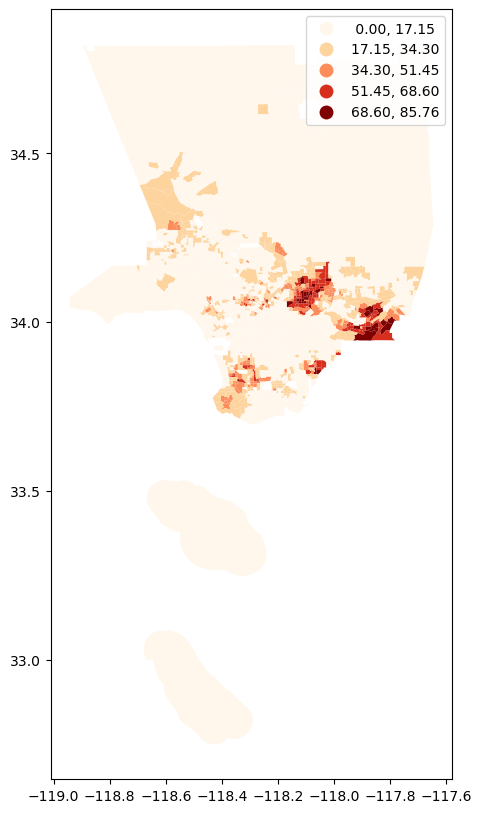

In [168]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_Asian',
                 cmap='OrRd',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

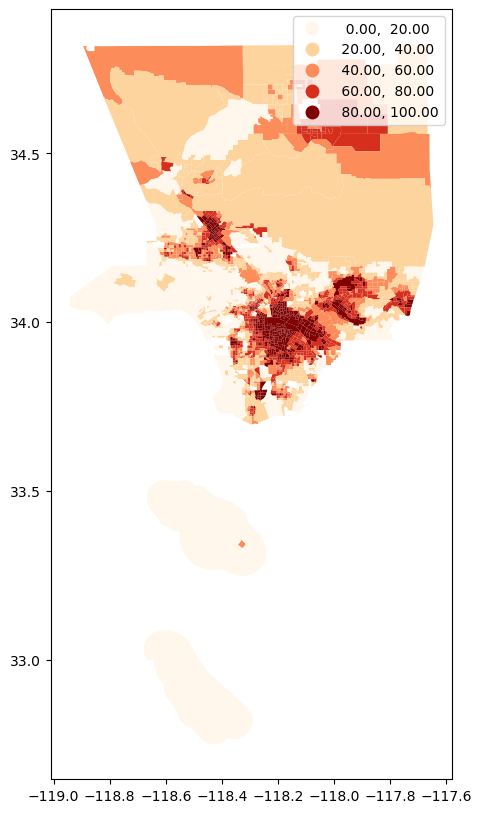

In [180]:
tracts_race.plot(figsize=(12,10),
                 column='PCT_Hispanic',
                 cmap='OrRd',
                 legend=True, 
                 scheme='equal_interval')

<AxesSubplot: >

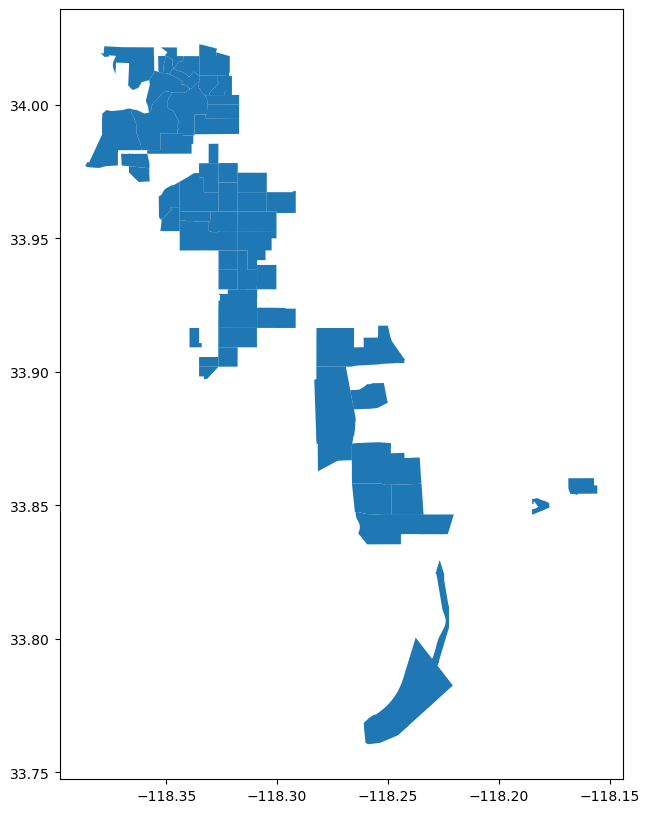

In [171]:
tracts_race[tracts_race.PCT_Black > 50].plot(figsize=(12,10))

<AxesSubplot: >

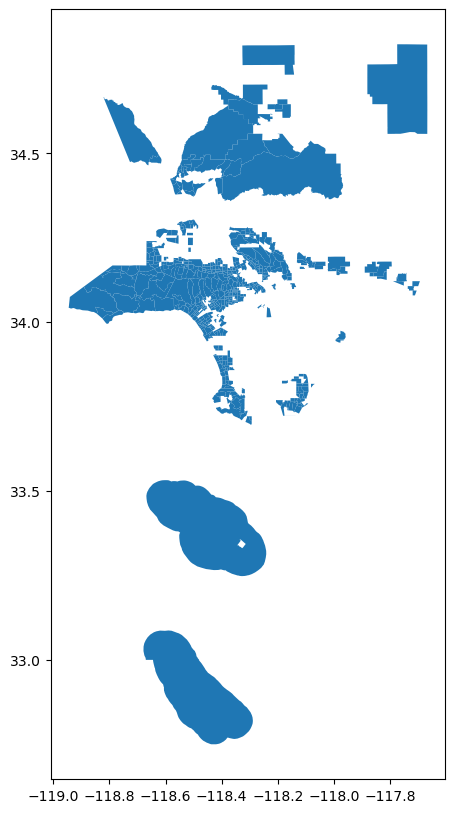

In [173]:
tracts_race[tracts_race.PCT_White > 50].plot(figsize=(12,10))

<AxesSubplot: >

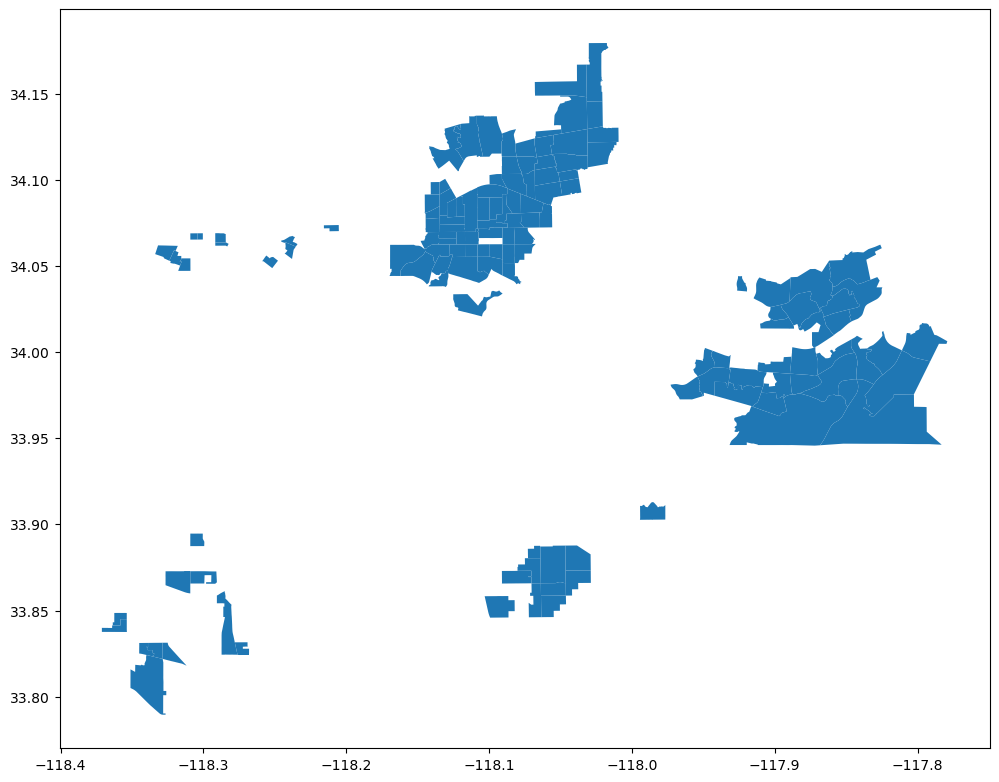

In [174]:
tracts_race[tracts_race.PCT_Asian > 50].plot(figsize=(12,10))

<AxesSubplot: >

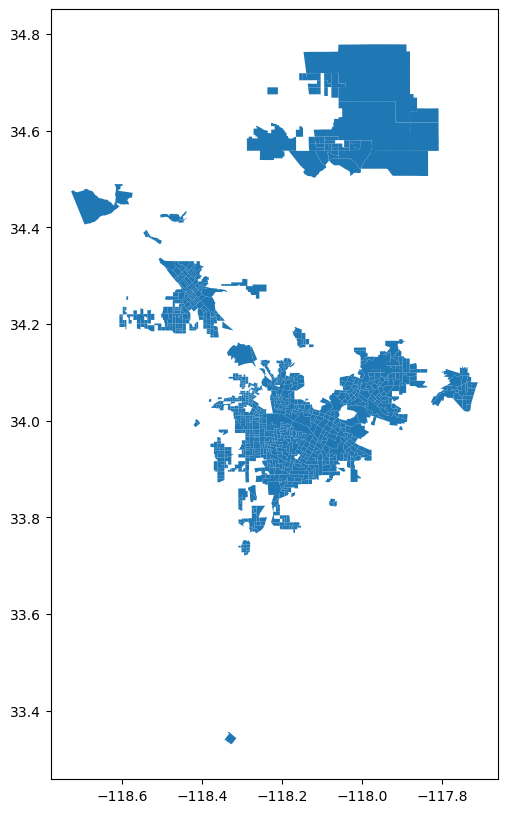

In [179]:
tracts_race[tracts_race.PCT_Hispanic > 50].plot(figsize=(12,10))

In [181]:
#they all fit like a puzzle!